In [1]:
import os
import glob
import numpy as np
import pandas as pd
import pyBigWig
import matplotlib.pyplot as plt
import seaborn as sns

def plot_tracks(tracks, interval, height=1.5, colors=None):
  _, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
  if not isinstance(axes, np.ndarray):
    axes = [axes]
  for ax, (title, y) in zip(axes, tracks.items()):
    if colors is not None:
      ax.fill_between(np.linspace(interval["start"], interval["end"], num=len(y)), y, color=colors[title])
    else:
      ax.fill_between(np.linspace(interval["start"], interval["end"], num=len(y)), y)
    ax.set_title(title)
    sns.despine(top=True, right=True, bottom=True)
  ax.set_xlabel(f"{interval['chrom']}:{interval['start']}-{interval['end']}")
  plt.tight_layout()

def plot_tracks_from_locus(locus, bws, colors):
    chrom, coord = locus.split(":")
    start, end = coord.split("-")
    start, end = int(start), int(end)
    interval = {"chrom": chrom, "start": int(start), "end": int(end)}
    tracks = {k: np.nan_to_num(np.array(bw.values(chrom, start, end))) for k, bw in bws.items()}
    plot_tracks(tracks, interval, height=1.5, colors=colors)

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
bw_dir = "/cellar/users/aklie/data/datasets/Chiou2021_islet_snATAC-seq/results/integration/atac/insertion_counts"
cellid_colors_path = "/cellar/users/aklie/data/datasets/Chiou2021_islet_snATAC-seq/ref/cellid_colors.csv"

In [3]:
order = ["alpha_1", "alpha_2", "beta_1", "beta_2", "delta_1", "delta_2", "gamma", "ductal", "acinar", "endocrine", "stellate", "immune"]

In [4]:
# Load cell id colors
cellid_colors = pd.read_csv(cellid_colors_path, index_col=0, header=None)
cellid_colors = cellid_colors.to_dict()[1]
cellid_colors = {k: cellid_colors[k] for k in order if k in cellid_colors}
cellid_colors

{'alpha_1': '#8b1200',
 'alpha_2': '#ff0000',
 'beta_1': '#0d8101',
 'beta_2': '#00ff00',
 'delta_1': '#fd8e02',
 'delta_2': '#ff7f00',
 'gamma': '#800780',
 'ductal': '#a7a7a7',
 'acinar': '#010101',
 'stellate': '#88ccea',
 'immune': '#0700ff'}

In [5]:
# Create a dict from file name (without extension) to pyBigWig object
bw_files = sorted(glob.glob(os.path.join(bw_dir, "*.bw")))
#bw_dict = {os.path.basename(f).split(".")[0]: pyBigWig.open(str(f)) for f in bw_files}
bw_dict = {os.path.basename(f).split("_unstranded.")[0]: pyBigWig.open(str(f)) for f in bw_files}
bw_dict = {k: bw_dict[k] for k in order if k in bw_dict}
bw_dict

{'alpha_1': <pyBigWig.bigWigFile at 0x1555501cbc00>,
 'alpha_2': <pyBigWig.bigWigFile at 0x1555501cba50>,
 'beta_1': <pyBigWig.bigWigFile at 0x1555501cbf60>,
 'beta_2': <pyBigWig.bigWigFile at 0x1555501cbe10>,
 'delta_1': <pyBigWig.bigWigFile at 0x1555501cbd80>,
 'delta_2': <pyBigWig.bigWigFile at 0x1555501cbed0>,
 'gamma': <pyBigWig.bigWigFile at 0x15555009b210>,
 'ductal': <pyBigWig.bigWigFile at 0x1555501cbf00>,
 'acinar': <pyBigWig.bigWigFile at 0x155511943cf0>,
 'stellate': <pyBigWig.bigWigFile at 0x15555009b150>,
 'immune': <pyBigWig.bigWigFile at 0x15555009bc90>}

# Glucagon locus

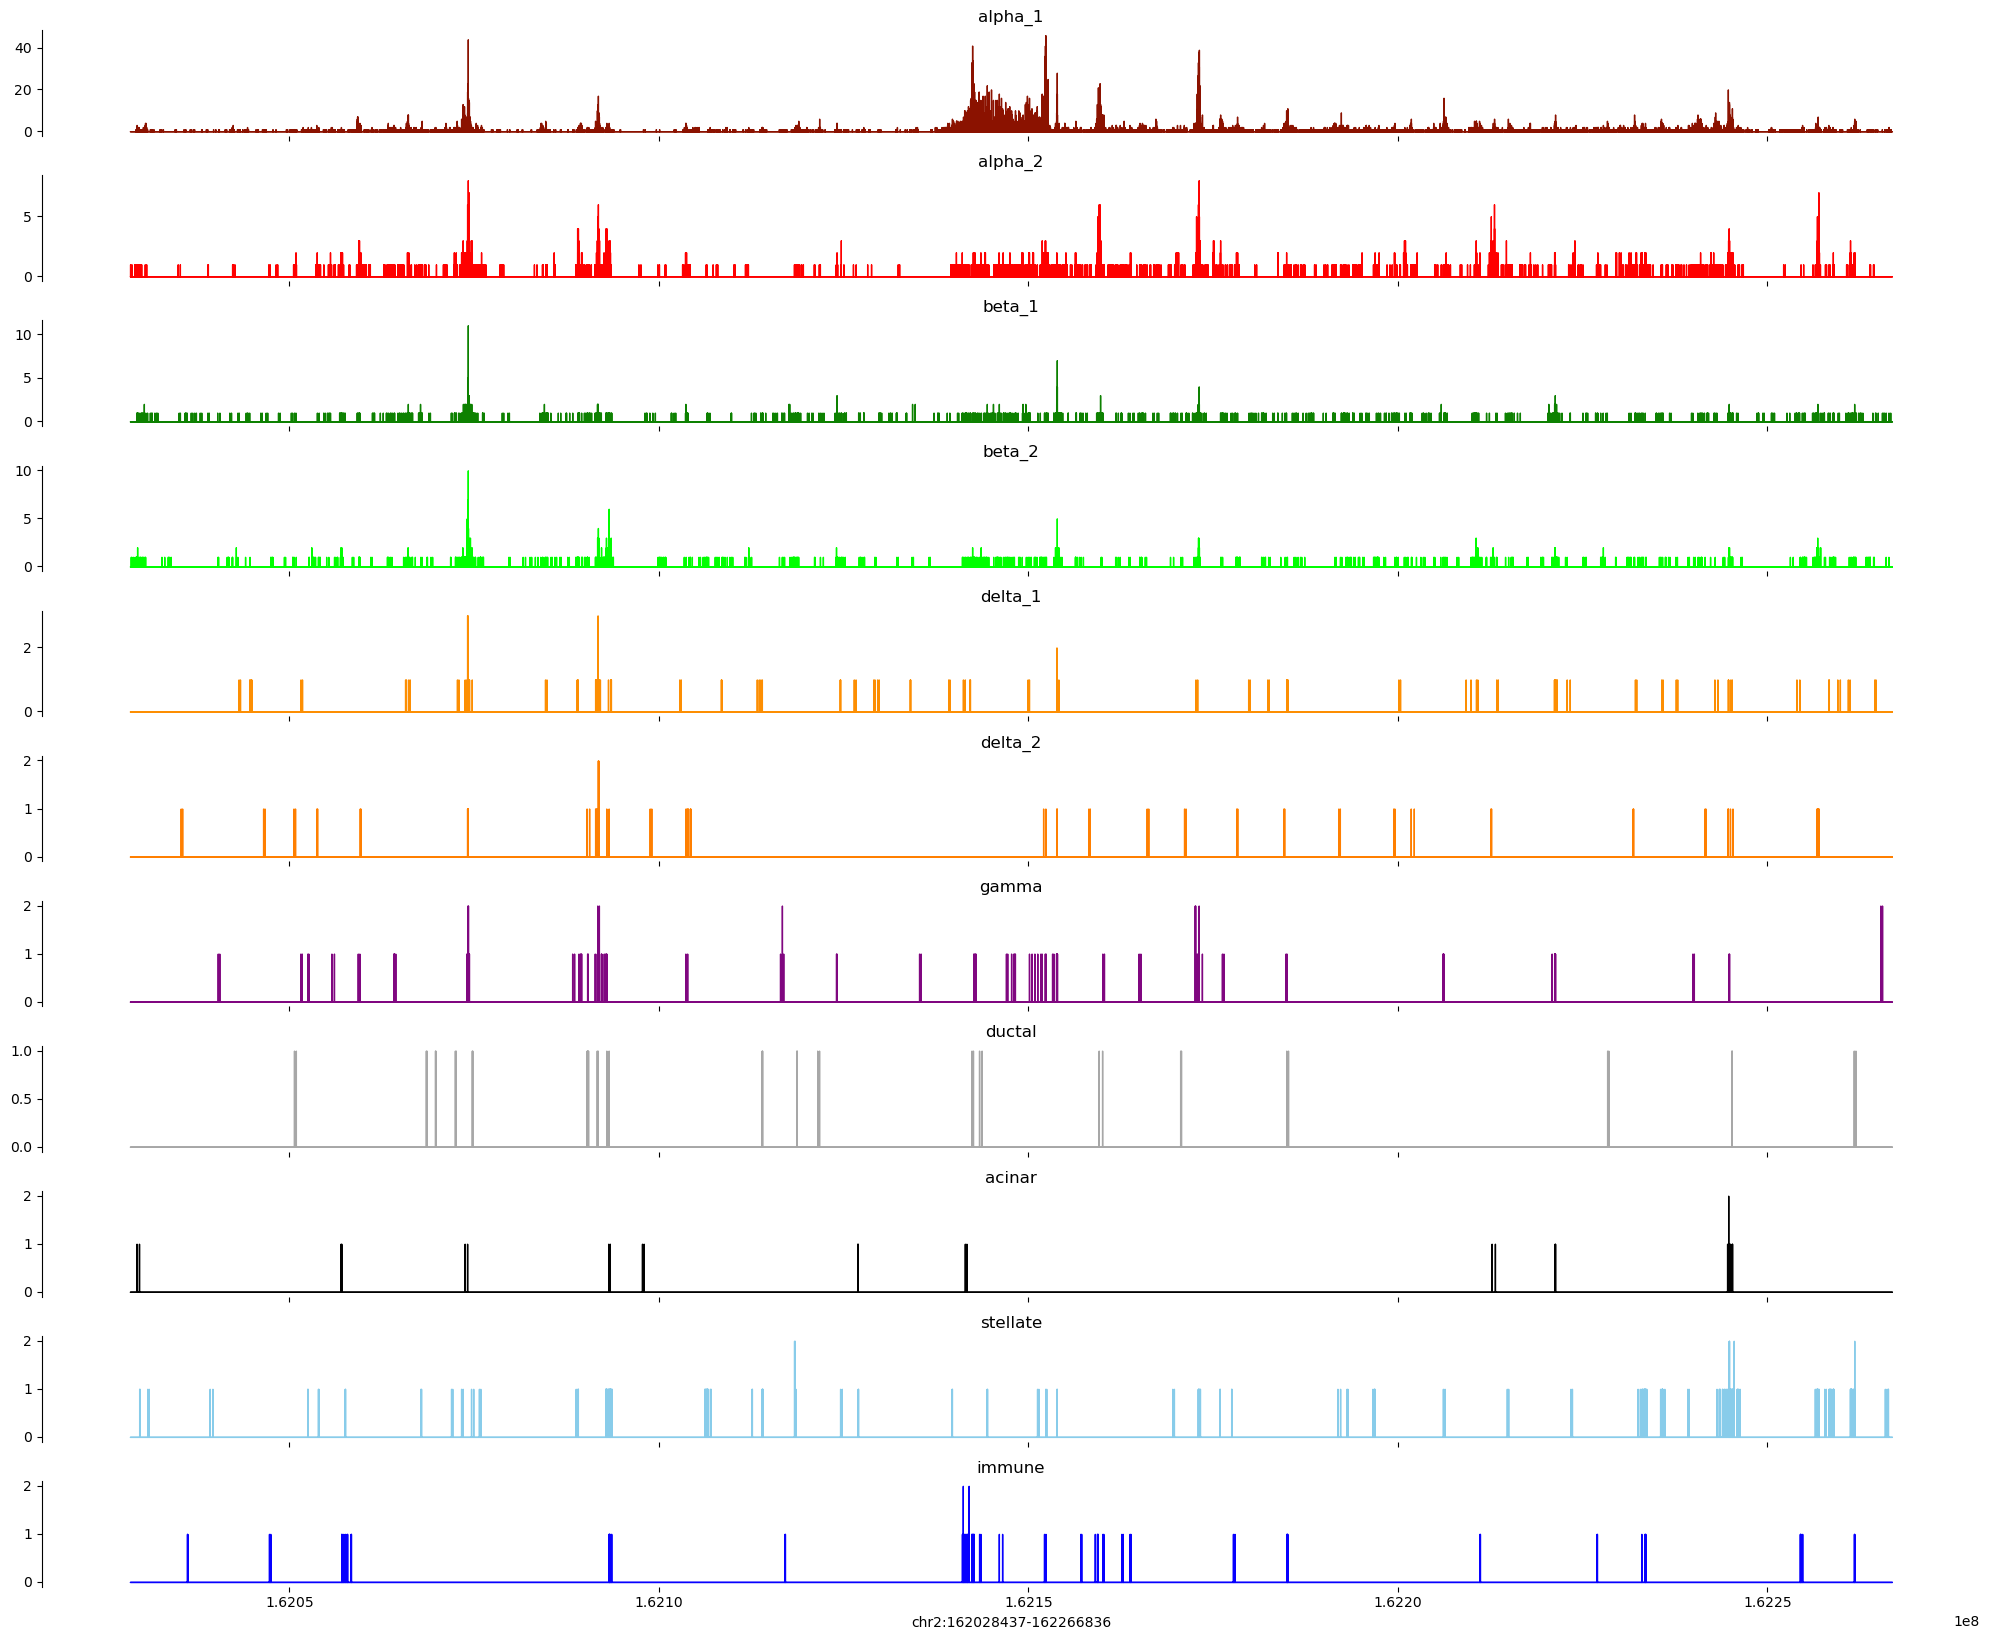

In [6]:
locus = "chr2:162028437-162266836"
plot_tracks_from_locus(locus, bw_dict, cellid_colors)

# Insulin locus

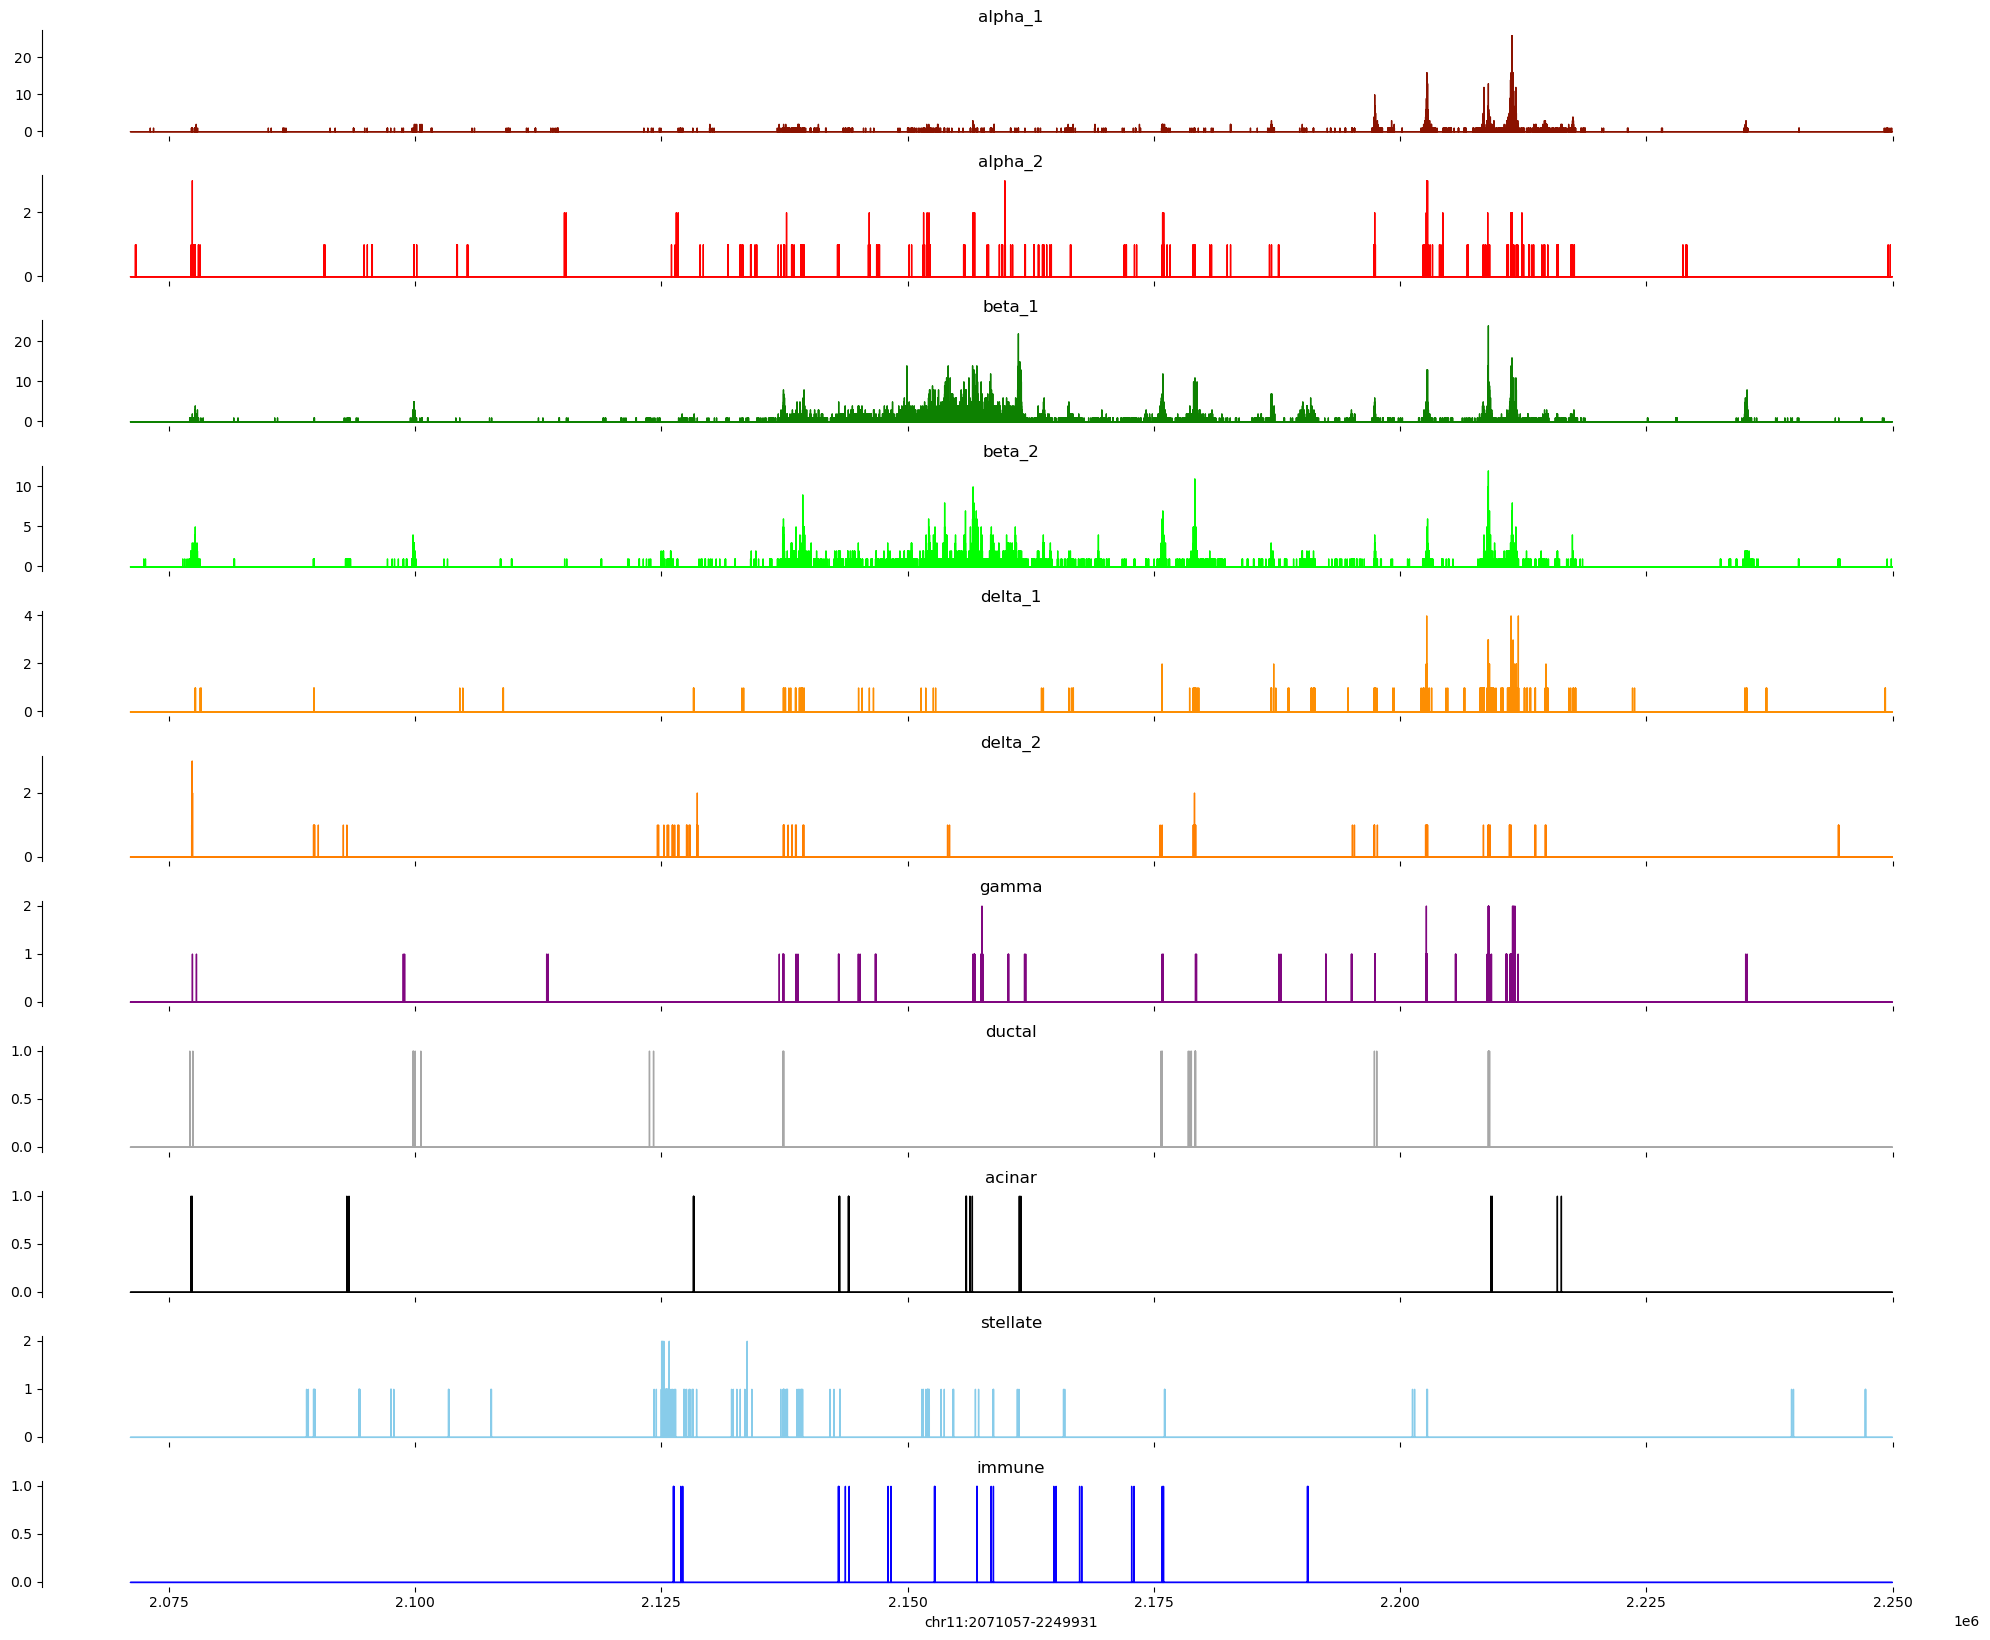

In [7]:
locus = "chr11:2071057-2249931"
plot_tracks_from_locus(locus, bw_dict, cellid_colors)

# Somatostatin locus

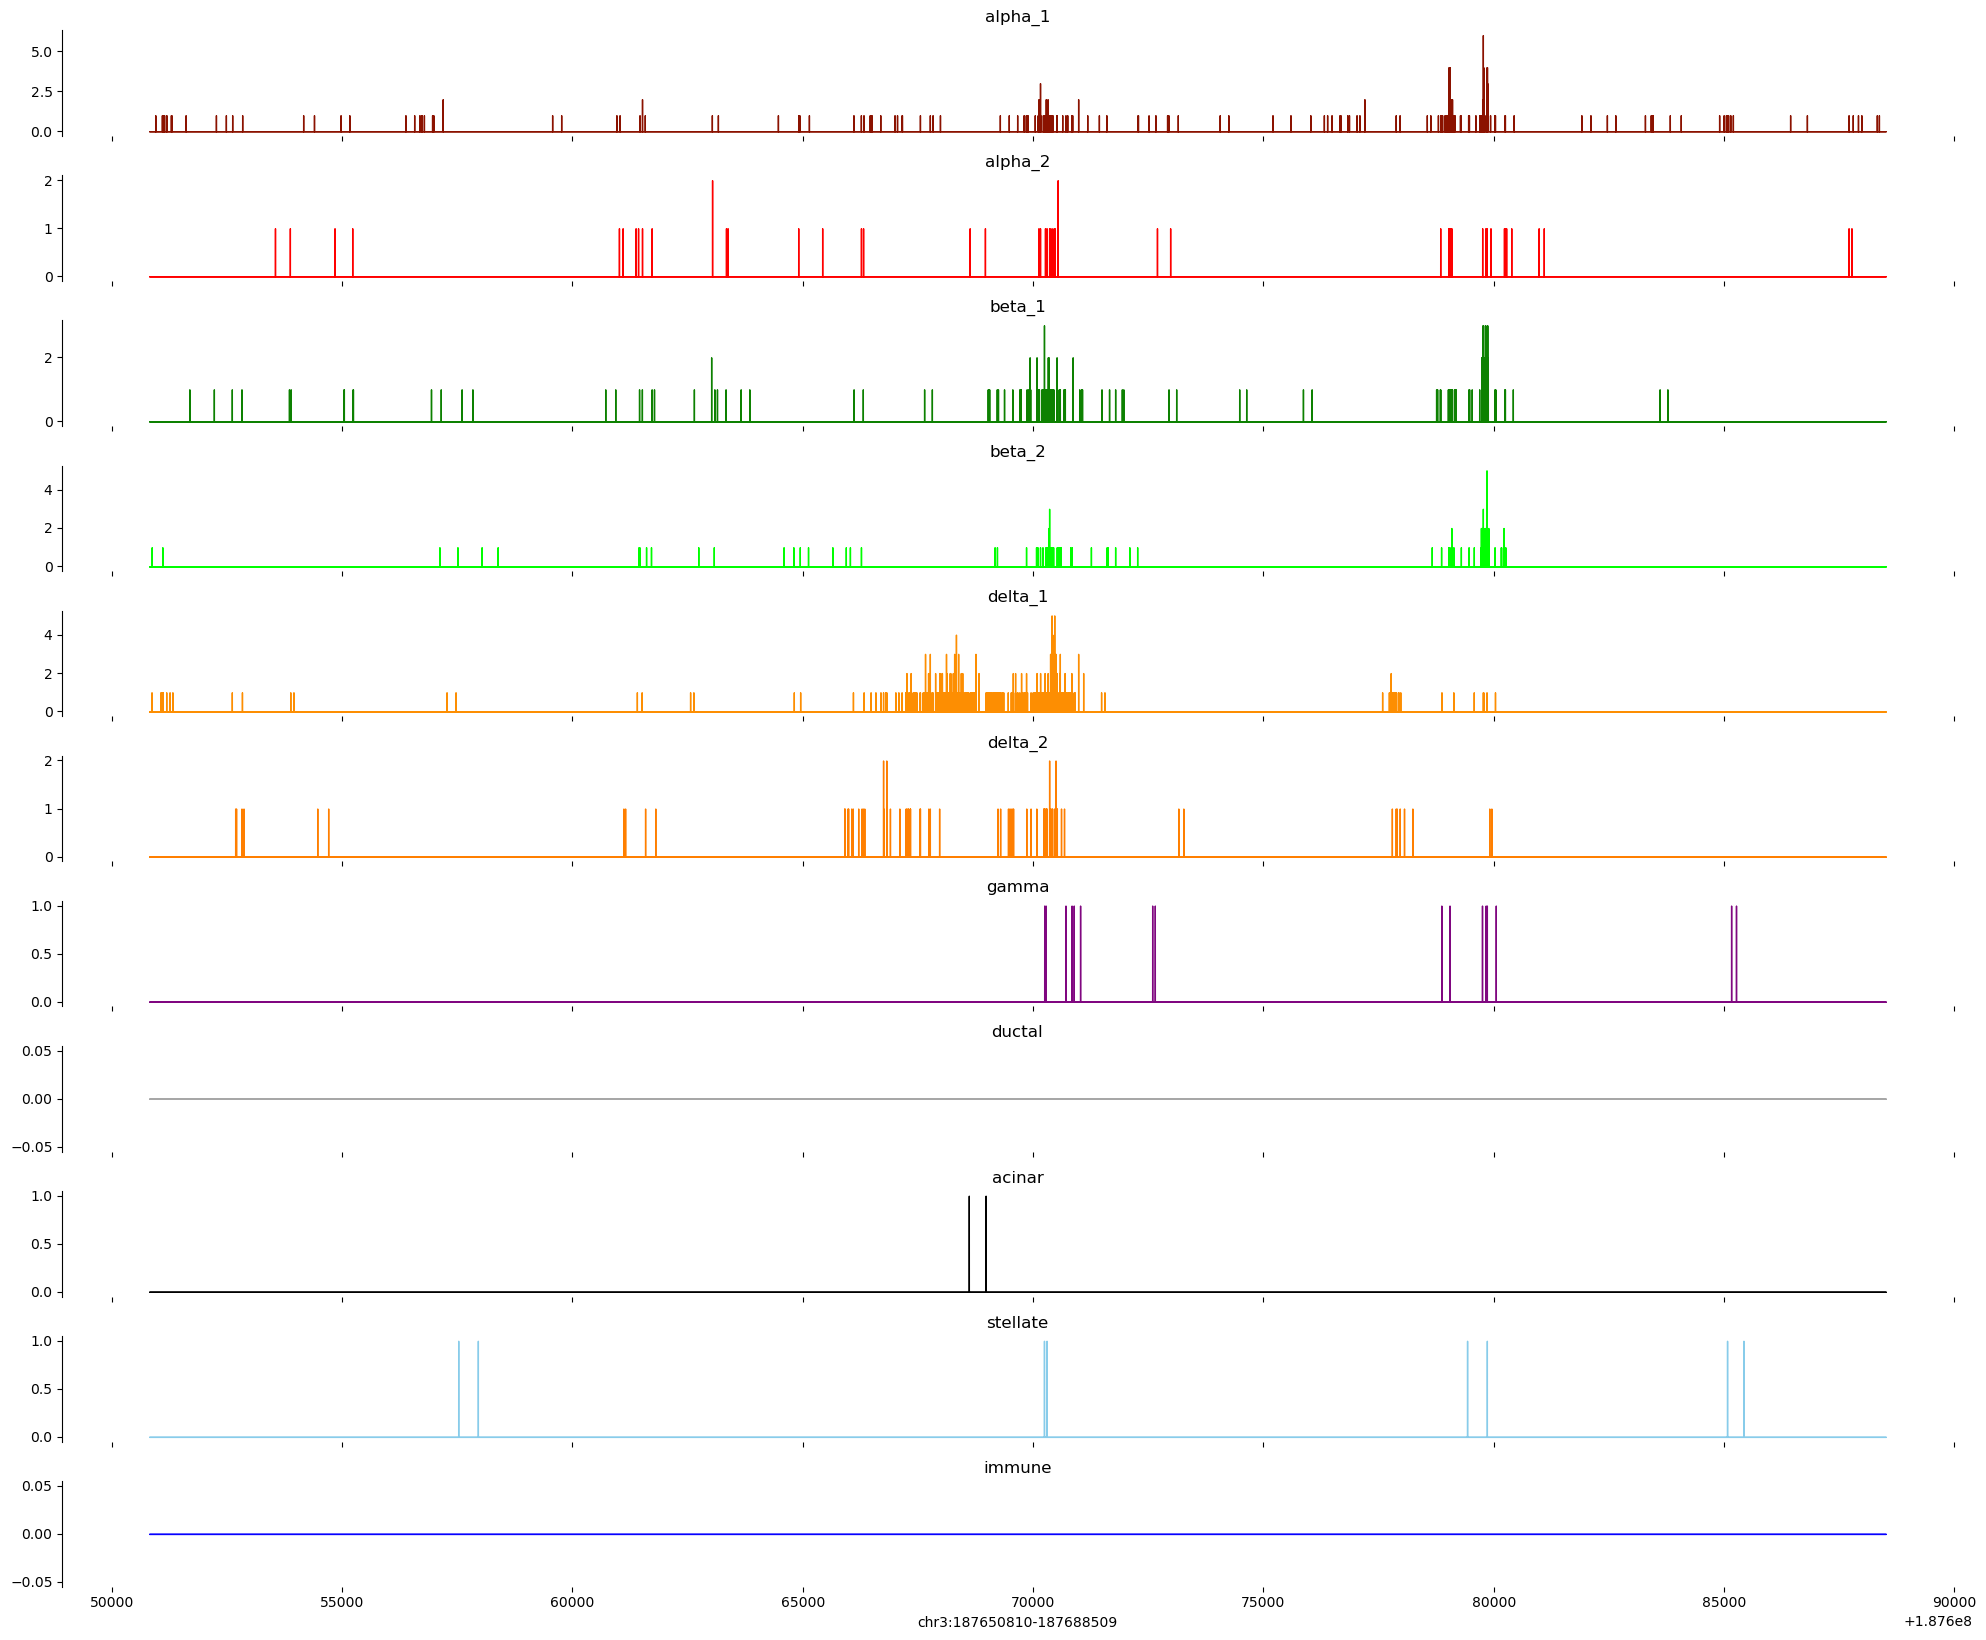

In [8]:
locus = "chr3:187650810-187688509"
plot_tracks_from_locus(locus, bw_dict, cellid_colors)

# PPY locus

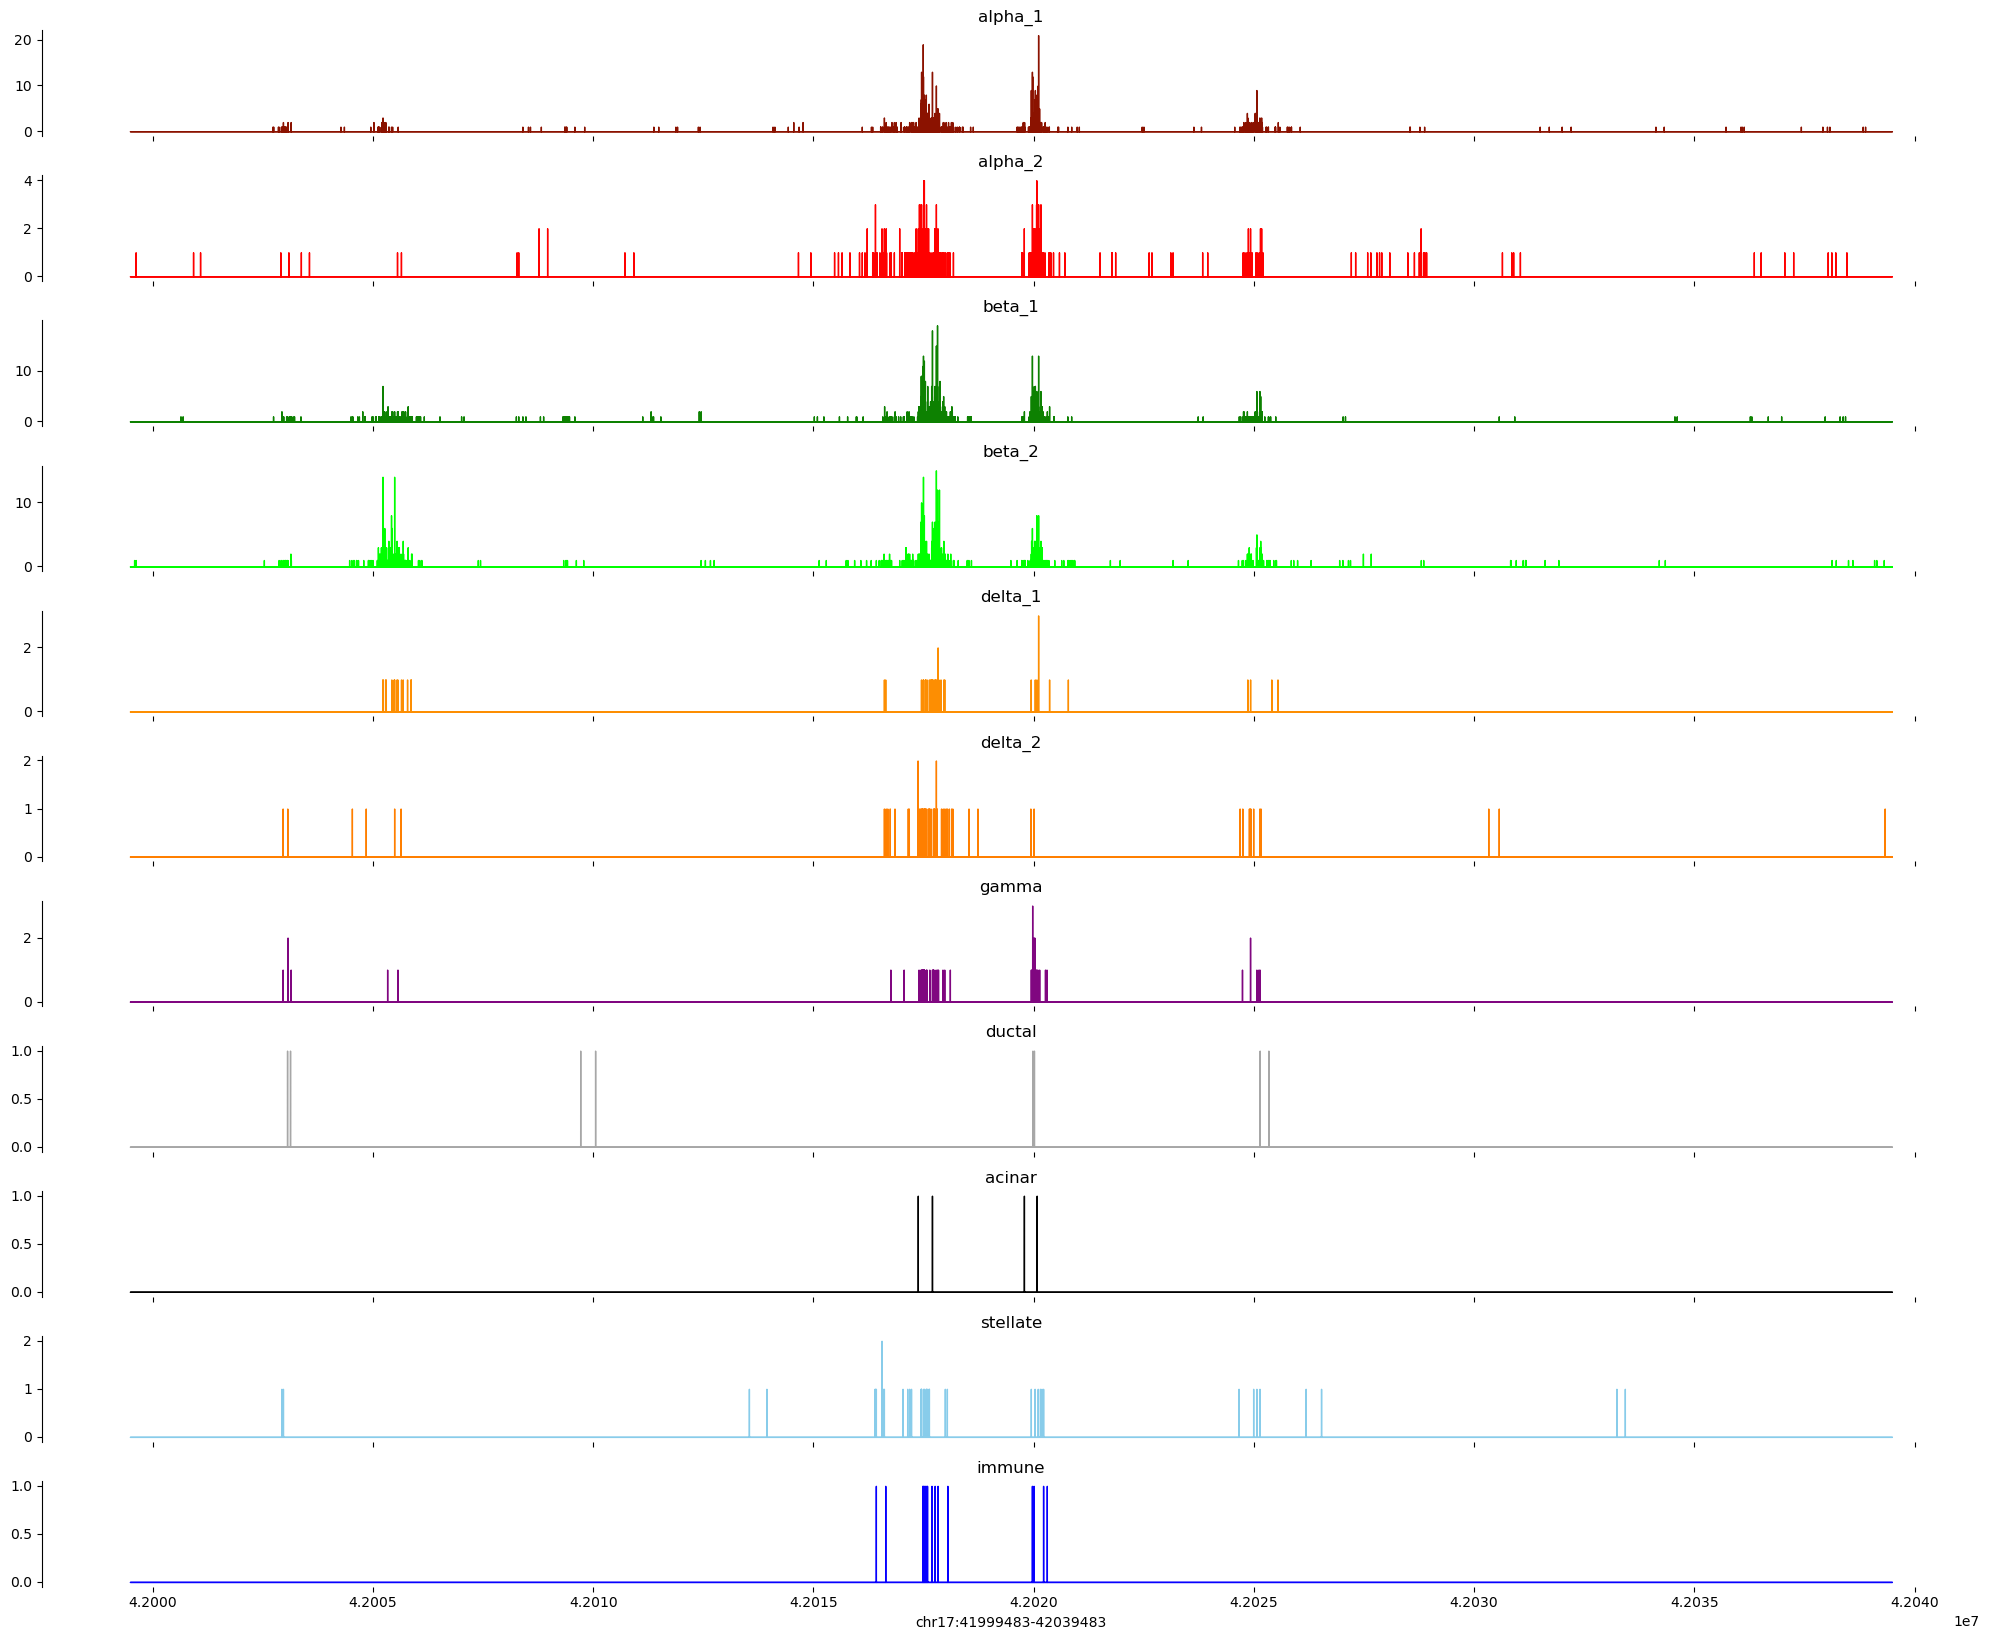

In [9]:
locus = "chr17:41999483-42039483"
plot_tracks_from_locus(locus, bw_dict, cellid_colors)

# DONE!